<a href="https://colab.research.google.com/github/brookegrantham/depression-twitter-thesis/blob/main/SIMPLE_ELECTRA_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
!pip install simpletransformers pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 250 kB 14.1 MB/s 
     |████████████████████████████████| 1.8 MB 62.8 MB/s 
     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.8 MB/s 
     |████████████████████████████████| 365 kB 70.5 MB/s 
     |████████████████████████████████| 4.9 MB 74.8 MB/s 
     |████████████████████████████████| 9.1 MB 83.2 MB/s 
     |████████████████████████████████| 1.3 MB 60.2 MB/s 
     |████████████████████████████████| 120 kB 62.7 MB/s 
     |████████████████████████████████| 181 kB 73.8 MB/s 
     |████████████████████████████████| 158 kB 76.7 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 157 kB 81.1 MB/s 
     |████████████████████████████████| 157 kB 89.9 MB/s 
     |████████████████████████████████| 157 kB 87.7 MB/s 
     |█████████████████████████████

In [ ]:
while True:pass

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os


all_text = []

df = pd.read_table('reddit-pretrain-text', header=None)
df.columns = ["text"]
# df = pd.read_csv("reddit_text.txt", sep='\t')


texts = df.text.tolist()
texts = [t for t in texts if isinstance(t, str)]
all_text.extend(texts)

train, test = train_test_split(all_text, test_size=0.1)


with open("train.txt", "w") as f:
    for line in train:
        f.write(line + "\n")

with open("test.txt", "w") as f:
    for line in test:
        f.write(line + "\n")

In [ ]:
!rm -R cache_dir sc_output_roberta

In [ ]:
'''CONTINUED FROM ELECTRA-BASE MODEL'''

import logging
import os


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
# os.environ["WANDB_DISABLED"] = "true"

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "save_steps" : 20000,
    "num_train_epochs":6,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "learning_rate": 4e-5,
    "train_batch_size": 64,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "ELECTRA - Pretrain 3",
    "wandb_kwargs": {"name": "Pre-Electra-BASE-10 epochs "},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 30522,
    "generator_config": {
        "embedding_size": 768,
        "hidden_size": 256,
        "num_hidden_layers": 3,
    },
    "discriminator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
    },
} 

from simpletransformers.language_modeling import LanguageModelingModel

train_file = "train.txt"
test_file = "test.txt"

# Mixing standard ELECTRA architectures example
model = LanguageModelingModel(
    "electra",
    'electra',
    generator_name='google/electra-small-generator',
    discriminator_name="google/electra-base-discriminator",
    args=train_args,
    train_files=train_file,
)

model.train_model(
    train_file, eval_file=test_file,
)
from simpletransformers.language_modeling import LanguageModelingModel
 
model = LanguageModelingModel(
    "electra", 
    'electra',
    generator_name='/content/outputs/best_model',
    discriminator_name="/content/outputs/best_model",
    args={"output_dir": "discriminator_trained"}
)
 
model.save_discriminator()



Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/662 [00:00<?, ?B/s]

  0%|          | 0/1592331 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: brookegrantham. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 6:   0%|          | 0/30002 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/173487 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/30002 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/30002 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/30002 [00:00<?, ?it/s]

In [ ]:
df = pd.read_csv('reddit_set.csv')
LEN = len(df[df['label']==2])
balanced_df = pd.concat([df[df['label']==2][:LEN],df[df['label']==1][:LEN],df[df['label']==0][:LEN]])
balanced_df = balanced_df.drop(['Unnamed: 0', 'PID'], axis=1)
balanced_df.to_csv('balanced_set.csv', index=None)

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import classification_report, accuracy_score, f1_score

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs(
    use_multiprocessing=False, 
    use_multiprocessing_for_evaluation=False,
    num_train_epochs=1,
    learning_rate=0.0000644,
    output_dir= "sc_output",
    overwrite_output_dir=True,
    wandb_project= "ELECTRA - Pretrain 2",
    wandb_kwargs = {"name": "Continued Fine-tune msl=256, epoch=1, balanced"},
    max_seq_length=256
)


# f = pd.read_csv("reddit_text.txt", sep='\t')
f = pd.read_csv('balanced_set.csv', usecols=['text','label'])
train, temp = train_test_split(f, test_size=0.3, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model = ClassificationModel("electra",
                            "/content/discriminator_trained/discriminator_model",
                            args=model_args,
                            num_labels=3)

# Train the model
model.train_model(train)

#continued training
import sklearn
import wandb
# Evaluate the model
result, model_outputs, predictions = model.eval_model(val, acc=accuracy_score,  cr=classification_report)
 
pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix(val.label.tolist(), pred, labels, normalize='true')

f = open('PRETRAIN Results', 'a')
f.write('\n')
f.write('CONTINUED FROM ELECTRA BASE MODEL')
f.write('\n')
f.write('MSL = 256, epoch=1, balanced')
f.write('\n')
f.write(classification_report(pred, val.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, val.label.tolist())))
f.write('\n')
f.write('Macro F1 Score:')
f.write(str(f1_score(pred, val.label.tolist(), average='macro')))
f.write('\n')
f.close()
print(result)

Some weights of the model checkpoint at /content/discriminator_trained/discriminator_model were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at /content/discriminator_trained/discriminator_model and are

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/163 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1443: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training loss,▄█▁
global_step,▁▅█
lr,█▅▁
Training loss,1.10315
global_step,150
lr,1e-05


{'mcc': 0.21636273395035074, 'acc': 0.4123989218328841, 'cr': '              precision    recall  f1-score   support\n\n         0.0       0.63      0.30      0.40       125\n         1.0       0.00      0.00      0.00       128\n         2.0       0.37      0.98      0.54       118\n\n    accuracy                           0.41       371\n   macro avg       0.33      0.43      0.31       371\nweighted avg       0.33      0.41      0.31       371\n', 'eval_loss': 1.0764069252825799}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import gc
import torch
def empty_gpu():
    model = None
    model_scratch=None
    gc.collect()
    torch.cuda.empty_cache()
empty_gpu()

In [ ]:
'''FROM SCRATCH MODEL'''

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "num_train_epochs": 6,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "learning_rate": 4e-5,
    "train_batch_size": 64,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "ELECTRA - Pretrain FROM  2 ",
    "wandb_kwargs": {"name": "Pre-Electra-SCRATCH"},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 30522,
    "generator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
        "num_hidden_layers": 3,
    },
    "discriminator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
    },
} 

from simpletransformers.language_modeling import LanguageModelingModel

train_file = "train.txt"
test_file = "test.txt"

# Mixing standard ELECTRA architectures example
model_scratch = LanguageModelingModel(
    "electra",
    None,
    args=train_args,
    train_files=train_file,
)

model_scratch.train_model(
    train_file, eval_file=test_file,
)
from simpletransformers.language_modeling import LanguageModelingModel
 
model_scratch = LanguageModelingModel(
    "electra", 
    "outputs/best_model",
    args={"output_dir": "discriminator_trained-SCRATCH"}
)

model_scratch.save_discriminator()

from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
import os

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")

transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs(
    use_multiprocessing=False,
    use_multiprocessing_for_evaluation=False,
    output_dir= "sc_output_SCRATCH",
    overwrite_output_dir=True,
    wandb_project= "ELECTRA - Pretrain 2",
    wandb_kwargs = {"name": "Continued Fine-tune"},
)

os.environ["TOKENIZERS_PARALLELISM"] = "false"

f = pd.read_csv("reddit_text.txt", sep='\t')
train, temp = train_test_split(f, test_size=0.2, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model_scratch = ClassificationModel("electra", "/content/discriminator_trained-SCRATCH/discriminator_model", args=model_args, num_labels=3)

# Train the model
model_scratch.train_model(train)

result, model_outputs, predictions = model_scratch.eval_model(val, acc= accuracy_score,  cr=classification_report)
 
pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix(val.label.tolist(), pred, labels, normalize='true')

f = open('PRETRAIN Results', 'a')
f.write('\n')
f.write('ELECTRA FROM SCRATCH')
f.write('\n')
f.write(classification_report(pred, val.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, val.label.tolist())))
f.write('\n')
f.write('Macro F1 Score:')
f.write(str(f1_score(pred, val.label.tolist(), average='macro')))
f.write('\n')
f.close()

print(result)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir +'PRETRAIN NOW'

Mounted at /content/gdrive


In [ ]:
empty_gpu()

In [ ]:
!rm -R cache_dir runs outputs

In [ ]:
'''CONTINUED FROM ROBERTA-BASE MODEL'''

import logging
import os


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "num_train_epochs": 6,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "save_steps" : 20000,
    "learning_rate": 4e-5,
    "train_batch_size": 50,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "ROBERTA - Pretrain 3",
    "wandb_kwargs": {"name": "Pre-ROBERTA-BASE-test pls work"},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 50265,
    "generator_config": {
        "embedding_size": 768,
        "hidden_size": 256,
        "num_hidden_layers": 3,
    },
    "discriminator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
    },
} 

from simpletransformers.language_modeling import LanguageModelingModel

train_file = "train.txt"
test_file = "test.txt"

# ROBERTA MLM
model = LanguageModelingModel(
    "roberta",
    'roberta-base',
    args=train_args,
    train_files=train_file,
)

model.train_model(
    train_file, eval_file=test_file,
)

 



  0%|          | 0/1588482 [00:00<?, ?it/s]

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: brookegrantham. Use `wandb login --relogin` to force relogin


Running Epoch 0 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/177336 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/38110 [00:00<?, ?it/s]

(228660,
 {'global_step': [38110,
   50000,
   76220,
   100000,
   114330,
   150000,
   152440,
   190550,
   200000,
   228660],
  'perplexity': [tensor(4.2628),
   tensor(4.1927),
   tensor(4.0739),
   tensor(4.0152),
   tensor(3.9597),
   tensor(3.8470),
   tensor(3.8453),
   tensor(3.7200),
   tensor(3.7138),
   tensor(3.6484)],
  'eval_loss': [1.4499190384300076,
   1.433340384708645,
   1.404599254736789,
   1.3900785710216834,
   1.3761735164756226,
   1.3472875895605971,
   1.3468445538771106,
   1.3137212296491079,
   1.312057065251922,
   1.2942843978096072],
  'train_loss': [0.4781877398490906,
   1.6402004957199097,
   0.9405862092971802,
   1.7056015729904175,
   1.1157054901123047,
   1.3753325939178467,
   1.0425845384597778,
   1.010301947593689,
   1.5314126014709473,
   0.6299647092819214]})

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
import os
from sklearn.model_selection import train_test_split

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")

transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs(
    use_multiprocessing=False,
    use_multiprocessing_for_evaluation=False,
    output_dir= "sc_output_roberta",
    overwrite_output_dir=True,
    wandb_project= "ROBERTA - Pretrain 3",
    wandb_kwargs = {"name": "Pre-ROBERTA-BASE-fine"},
    max_seq_length=256,
    num_train_epochs=6,
    learning_rate=0.0000644,
)

os.environ["TOKENIZERS_PARALLELISM"] = "false"

f = pd.read_csv("reddit_text.txt", sep='\t')
train, temp = train_test_split(f, test_size=0.2, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model = ClassificationModel("roberta", "outputs/best_model", args=model_args, num_labels=3)

# Train the model
model.train_model(train)




Some weights of the model checkpoint at outputs/best_model were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at outputs/best_model and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
Y

Epoch:   0%|          | 0/6 [00:00<?, ?it/s]

Training loss,▇▄▄▇▄▅▄▅█▅▃▆▄▃▆▄▅▆▅▃▇▃▅▆▃▂▃▆▁▆▄▂▅▃▅▅▁▃▂▃
eval_loss,█▇▆▅▅▃▃▂▂▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
lr,▃▄████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
perplexity,█▇▆▅▅▃▃▂▂▁
train_loss,▁█▄█▅▆▄▄▇▂
Training loss,1.27875
eval_loss,1.29428
global_step,228660
lr,0.0
perplexity,3.64838


Running Epoch 0 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 1 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 2 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 3 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 4 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

Running Epoch 5 of 6:   0%|          | 0/588 [00:00<?, ?it/s]

(3528, 0.5349404559705128)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
result, model_outputs, predictions = model.eval_model(val, acc= accuracy_score,  cr=classification_report)
import wandb

pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix( pred, val.label.tolist(), [0,1,2], normalize='true')

f = open('PRETRAIN Results', 'a')
f.write('\n')
f.write('ROBERTA-BASE CONTINUED')
f.write('\n')
f.write('MSL = 256 EPOCHS = 4')
f.write('\n')
f.write(classification_report(pred, val.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, val.label.tolist())))
f.write('\n')
f.write('Macro F1 Score:')
f.write(str(f1_score(pred, val.label.tolist(), average='macro')))
f.write('\n')
f.close()

print(result)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1445: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/98 [00:00<?, ?it/s]

Training loss,▅▅▆▅▃▄▅▄▄▃▆▄▅▃▃▄▃▃▃▃▂▁▅▂▅▁▄▁▁▁▅█▁▁▁▁▅▁▂▁
global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
lr,▃▄████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
Training loss,0.00175
global_step,3500
lr,0.0


wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.


{'mcc': 0.3697515703566114, 'acc': 0.6360153256704981, 'cr': '              precision    recall  f1-score   support\n\n         0.0       0.65      0.63      0.64       323\n         1.0       0.64      0.66      0.65       383\n         2.0       0.58      0.55      0.56        77\n\n    accuracy                           0.64       783\n   macro avg       0.62      0.61      0.62       783\nweighted avg       0.64      0.64      0.64       783\n', 'eval_loss': 2.119264624252611}


In [ ]:
df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=val.label.tolist()
df['text']=val.text.tolist()
df.to_csv('val_res.csv')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, val.label.tolist(), normalize='true')

array([[0.6474359 , 0.33653846, 0.01602564],
       [0.28822055, 0.63659148, 0.07518797],
       [0.08333333, 0.33333333, 0.58333333]])

In [ ]:
#from scratch 
import sklearn
# Evaluate the model
result, model_outputs, predictions = model.eval_model(test, acc=sklearn.metrics.accuracy_score)

pred = model_outputs.argmax(axis=1)

wandb.sklearn.plot_confusion_matrix( pred, test.label.tolist(), labels, normalize='true')

print(result)
f = open('PRETRAIN Results', 'a')
f.write('\n')
f.write('TEST SET RESULTS')
f.write('\n')
f.write('ROBERTA-BASE CONTINUED')
f.write('\n')
f.write('MSL = 256 EPOCHS = 6')
f.write('\n')
f.write(classification_report(pred, test.label.tolist()))
f.write('\n')
f.write('Accuracy Score:')
f.write(str(accuracy_score(pred, test.label.tolist())))
f.write('\n')
f.write('Macro F1 Score:')
f.write(str(f1_score(pred, test.label.tolist(), average='macro')))
f.write('\n')
f.close()



/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1445: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/49 [00:00<?, ?it/s]

{'mcc': 0.28925255189351123, 'acc': 0.5816326530612245, 'eval_loss': 2.4884468487330844}


TypeError: ignored

In [ ]:
wandb.sklearn.plot_confusion_matrix( pred, test.label.tolist(), labels)

In [ ]:
print(confusion_matrix(pred, test.label.tolist(),normalize='true'))

[[0.60693642 0.35260116 0.04046243]
 [0.31147541 0.57377049 0.1147541 ]
 [0.27777778 0.22222222 0.5       ]]


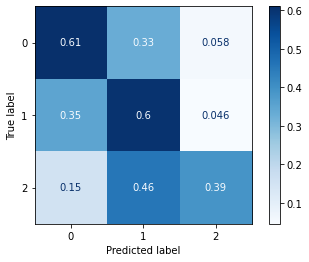

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(test.label.tolist(), pred, normalize='true', cmap='Blues')




In [ ]:
df = pd.DataFrame(model_outputs)
df['pred']= pred
df['true']=test.label.tolist()
df['text']=test.text.tolist()
df.to_csv('TEST_RESULTS_ROBBIE.csv')

ROBERTA FROM SCRATCH


In [ ]:
 '''CONTINUED FROM ROBERTA-BASE MODEL'''

import logging
import os


logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "num_train_epochs": 6,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "save_steps" : 20000,
    "learning_rate": 4e-5,
    "train_batch_size": 50,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "ROBERTA - Pretrain SCRATCH 19",
    "wandb_kwargs": {"name": "Pre-ROBERTA SCRATCH"},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 50265,
    "generator_config": {
        "embedding_size": 768,
        "hidden_size": 256,
        "num_hidden_layers": 3,
    },
    "discriminator_config": {
        "embedding_size": 128,
        "hidden_size": 256,
    },
} 

from simpletransformers.language_modeling import LanguageModelingModel

train_file = "train.txt"
test_file = "test.txt"

# ROBERTA MLM
model = LanguageModelingModel(
    "roberta",
    None,
    args=train_args,
    train_files=train_file,
)

model.train_model(
    train_file, eval_file=test_file,
)

KeyboardInterrupt: ignored

In [ ]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
import pandas as pd
import os
from sklearn.model_selection import train_test_split

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")

transformers_logger.setLevel(logging.WARNING)

model_args = ClassificationArgs(
    use_multiprocessing=False,
    use_multiprocessing_for_evaluation=False,
    output_dir= "sc_output_roberta",
    overwrite_output_dir=True,
    wandb_project= "ROBERTA - Pretrain SCRATCH 19",
    wandb_kwargs = {"name": "SCRATCH FINE"},
    max_seq_length=256,
    num_train_epochs=6,
    learning_rate=0.0000644,
)

os.environ["TOKENIZERS_PARALLELISM"] = "false"

f = pd.read_csv("reddit_text.txt", sep='\t')
train, temp = train_test_split(f, test_size=0.2, random_state=123)
val, test = train_test_split(temp, test_size=(1/3), random_state=123)
labels = ['control', 'moderate', 'severe']

model = ClassificationModel("roberta", "outputs/best_model", args=model_args, num_labels=3)

# Train the model
model.train_model(train)




SWEEP TO KEEP IT RUNNING

In [ ]:
import logging
from statistics import mean, mode

import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import wandb
from simpletransformers.classification import ClassificationArgs, ClassificationModel

sweep_config = {
    "name": "sweep-roberta",
    "method": "bayes",
    "metric": {"name": "accuracy", "goal": "maximize"},
    "parameters": {
        "num_train_epochs": {"min": 2, "max": 6},
        "learning_rate": {"min": 1e-5, "max": 4e-5},
    },
    "early_terminate": {"type": "hyperband", "min_iter": 6,},
}

sweep_id = wandb.sweep(sweep_config, project="RoBERTa 2 - Optimisation")

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Preparing train data
train = pd.read_csv('reddit_set.csv', usecols=['text','label'])
train_df, eval = train_test_split(train, test_size=0.3, random_state=123)
eval_df, test_df = train_test_split(eval, test_size=(1/3), random_state=123)

model_args = ClassificationArgs()

train_args = {
    "reprocess_input_data": False,
    "overwrite_output_dir": True,
    "num_train_epochs": 3,
    "save_eval_checkpoints": True,
    "save_model_every_epoch": False,
    "learning_rate": 2e-5,
    "warmup_steps": 10000,
    "train_batch_size": 64,
    "eval_batch_size": 128,
    "gradient_accumulation_steps": 1,
    "block_size": 128,
    "max_seq_length": 128,
    "dataset_type": "simple",
    "wandb_project": "RoBERTa 2 - Optimisation",
    "wandb_kwargs": {"name": "RoBERTa 2 - Optimisation"},
    "logging_steps": 100,
    "evaluate_during_training": True,
    "evaluate_during_training_steps": 50000,
    "evaluate_during_training_verbose": True,
    "use_cached_eval_features": True,
    "sliding_window": True,
    "vocab_size": 52000,

}


def train():
    # Initialize a new wandb run
    wandb.init()

    # Create a TransformerModel
    model = ClassificationModel(
        "roberta",
        "/content/outputs/best_model",
        num_labels=3,
        use_cuda=True,
        args=train_args,
        sweep_config=wandb.config,
    )

    # Train the model
    model.train_model(
        train_df,
        eval_df=eval_df,
        accuracy=lambda truth, predictions: accuracy_score(
            truth, [round(p) for p in predictions]),
    )
    # result, model_outputs, predictions = model.eval_model(test_df, acc=accuracy_score)
    # Sync wandb
    wandb.join()

# train()
wandb.agent(sweep_id, train)

In [ ]:
from transformers import RobertaTokenizer, RobertaForMaskedLM, BertTokenizer, BertForMaskedLM
from transformers import DataCollatorForLanguageModeling
from transformers import Trainer, TrainingArguments

import os

# os.environ["WANDB_DISABLED"] = "true"

# tokenizer = BertTokenizer.from_pretrained('prajjwal1/bert-tiny')
# model = BertForMaskedLM.from_pretrained('prajjwal1/bert-tiny')

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForMaskedLM.from_pretrained('roberta-base')

from transformers import LineByLineTextDataset

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="reddit-pretrain-text",
    block_size=128,
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

training_args = TrainingArguments(
    output_dir="./robertab-dep",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=16,
    save_steps=500,
    save_total_limit=2,
    seed=123
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset
)

trainer.train()

trainer.save_model("./robertab-dep")

In [ ]:
# import logging
# from statistics import mean, mode

# import pandas as pd
# from sklearn.metrics import accuracy_score, f1_score
# from sklearn.model_selection import train_test_split

# import wandb
# from simpletransformers.classification import ClassificationArgs, ClassificationModel

# sweep_config = {
#     "name": "sweep-electra",
#     "method": "bayes",
#     "metric": {"name": "accuracy", "goal": "maximize"},
#     "parameters": {
#         "num_train_epochs": {"min": 2, "max": 6},
#         "learning_rate": {"min": 1e-5, "max": 4e-4},
#     },
#     "early_terminate": {"type": "hyperband", "min_iter": 6,},
# }

# sweep_id = wandb.sweep(sweep_config, project="ELECTRA - Pretrain 2")

# logging.basicConfig(level=logging.INFO)
# transformers_logger = logging.getLogger("transformers")
# transformers_logger.setLevel(logging.WARNING)

# # Preparing train data
# train1 = pd.read_csv('reddit_set.csv', usecols=['text','label'])
# train_df, eval = train_test_split(train1, test_size=0.3, random_state=123)
# eval_df, test_df = train_test_split(eval, test_size=(1/3), random_state=123)

# train_args = {
#     "reprocess_input_data": False,
#     "overwrite_output_dir": True,
#     "num_train_epochs": 3,
#     "save_eval_checkpoints": True,
#     "save_model_every_epoch": False,
#     "learning_rate": 2e-5,
#     "warmup_steps": 10000,
#     "train_batch_size": 64,
#     "eval_batch_size": 128,
#     "gradient_accumulation_steps": 1,
#     "block_size": 128,
#     "max_seq_length": 128,
#     "dataset_type": "simple",
#     "wandb_project": "ELECTRA - Pretrain 2",
#     "wandb_kwargs": {"name": "ELECTRA - Pretrain"},
#     "logging_steps": 100,
#     "evaluate_during_training": True,
#     "evaluate_during_training_steps": 50000,
#     "evaluate_during_training_verbose": True,
#     "use_cached_eval_features": True,
#     "sliding_window": True,
#     "vocab_size": 52000,
# }


# def train():
#     # Initialize a new wandb run
#     wandb.init()

#     # Create a TransformerModel
#     model = ClassificationModel(
#         "electra",
#         "/content/discriminator_trained/discriminator_model",
#         # 'google/electra-base-discriminator',
#         num_labels=3,
#         use_cuda=True,
#         args=train_args,
#         sweep_config=wandb.config,
#     )

#     # Train the model
#     model.train_model(
#         train_df,
#         eval_df=eval_df,
#         accuracy=lambda truth, predictions: accuracy_score(
#             truth, [round(p) for p in predictions]),
#     )
#     # result, model_outputs, predictions = model.eval_model(test_df, acc=accuracy_score)
#     # Sync wandb
#     wandb.join()

# # train()
# wandb.agent(sweep_id, train)